# In Class Notebook, Week 09

To access this in near-real time try: https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2025/blob/master/week09/inClass_week09.ipynb

```javascript
{
  "$schema": "https://vega.github.io/schema/vega-lite/v6.json",
  "width": 300, "height": 200,
  "data": {"url": "data/unemployment-across-industries.json"},
  "mark": "area",
  "encoding": {
    "x": {
      "timeUnit": "yearmonth", "field": "date",
      "axis": {"format": "%Y"}
    },
    "y": {
      "aggregate": "sum", "field": "count"
    },
    "color": {
      "field": "series",
      "scale": {"scheme": "category20b"}
    }
  }
}
```

In [1]:
import altair as alt

In [3]:
chart1 = alt.Chart.from_dict({
  #"$schema": "https://vega.github.io/schema/vega-lite/v6.json",
  "width": 300, "height": 200,
  "data": {"url": "https://raw.githubusercontent.com/vega/vega-datasets/next/data/unemployment-across-industries.json"},
  "mark": "area",
  "encoding": {
    "x": {
      "timeUnit": "yearmonth", "field": "date",
      "axis": {"format": "%Y"}
    },
    "y": {
      "aggregate": "sum", "field": "count"
    },
    "color": {
      "field": "series",
      "scale": {"scheme": "category20b"}
    }
  }
}
)

chart1

alt.Chart(...)

## Dashboards in Altair (using vega-lite)

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv')

In [6]:
df.head()

ID            Name  Mobility State  Population  Urban  Black  Seg_racial  \
0  100    Johnson City  0.062199    TN      576081      1  0.021       0.090   
1  200      Morristown  0.053652    TN      227816      1  0.020       0.093   
2  301  Middlesborough  0.072635    TN       66708      0  0.015       0.064   
3  302       Knoxville  0.056281    TN      727600      1  0.056       0.210   
4  401   Winston-Salem  0.044801    NC      493180      1  0.174       0.262   

   Seg_income  Seg_poverty  ...  Migration_out  Foreign_born  Social_capital  \
0       0.035        0.030  ...          0.005         0.012          -0.298   
1       0.026        0.028  ...          0.014         0.023          -0.767   
2       0.024        0.015  ...          0.012         0.007          -1.270   
3       0.092        0.084  ...          0.014         0.020          -0.222   
4       0.072        0.061  ...          0.019         0.053          -0.018   

   Religious  Violent_crime  Single_mothers  Divorced  Married  Longitude  \
0      0.514          0.001           0.190     0.110    0.601 -82.436386   
1      0.544          0.002           0.185     0.116    0.613 -83.407249   
2      0.668          0.001           0.211     0.113    0.590 -83.535332   
3      0.602          0.001           0.206     0.114    0.575 -84.242790   
4      0.488          0.003           0.220     0.092    0.586 -80.505333   

    Latitude  
0  36.470371  
1  36.096539  
2  36.551540  
3  35.952259  
4  36.081276  

[5 rows x 43 columns]

In [7]:
df.columns

Index(['ID', 'Name', 'Mobility', 'State', 'Population', 'Urban', 'Black',
       'Seg_racial', 'Seg_income', 'Seg_poverty', 'Seg_affluence', 'Commute',
       'Income', 'Gini', 'Share01', 'Gini_99', 'Middle_class',
       'Local_tax_rate', 'Local_gov_spending', 'Progressivity', 'EITC',
       'School_spending', 'Student_teacher_ratio', 'Test_scores', 'HS_dropout',
       'Colleges', 'Tuition', 'Graduation', 'Labor_force_participation',
       'Manufacturing', 'Chinese_imports', 'Teenage_labor', 'Migration_in',
       'Migration_out', 'Foreign_born', 'Social_capital', 'Religious',
       'Violent_crime', 'Single_mothers', 'Divorced', 'Married', 'Longitude',
       'Latitude'],
      dtype='object')

We want a dashboard with:
1. on the "Driver" or left side, a heatmap with the State (y-axis), and Student_teacher_ratio (x-axis)
2. On the "response" plot, we want a histogram of Mobility score

<AxesSubplot:ylabel='Frequency'>

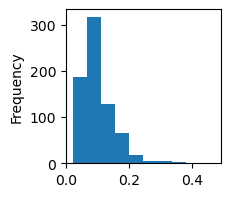

In [9]:
df['Mobility'].plot(kind='hist', figsize=(2,2))

<AxesSubplot:ylabel='Frequency'>

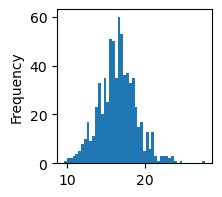

In [11]:
df['Student_teacher_ratio'].plot(kind='hist', bins=50, figsize=(2,2))

In [12]:
import numpy as np

In [13]:
bins = np.linspace(df['Student_teacher_ratio'].min(), df['Student_teacher_ratio'].max(), 10)

In [14]:
bins

array([ 9.6       , 11.61111111, 13.62222222, 15.63333333, 17.64444444,
       19.65555556, 21.66666667, 23.67777778, 25.68888889, 27.7       ])

<AxesSubplot:ylabel='Frequency'>

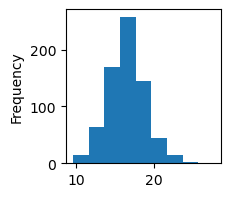

In [15]:
df['Student_teacher_ratio'].plot(kind='hist', bins=bins, figsize=(2,2))

In [17]:
table = df.pivot_table(index='State', columns=pd.cut(df['Student_teacher_ratio'],bins), aggfunc='size')
# if you are at like 60% of getting this -- that is fine!

/var/folders/t7/bwcvd_4177q4872gxghn7p9r0000gq/T/ipykernel_44590/325858913.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table = df.pivot_table(index='State', columns=pd.cut(df['Student_teacher_ratio'],bins), aggfunc='size')


In [18]:
table

Student_teacher_ratio  (9.6, 11.611]  (11.611, 13.622]  (13.622, 15.633]  \
State                                                                      
AK                                 0                 1                 4   
AL                                 0                 0                 0   
AR                                 0                 0                 0   
AZ                                 0                 0                 0   
CA                                 0                 0                 0   
CO                                 1                 1                 4   
CT                                 0                 0                 1   
DC                                 0                 0                 0   
DE                                 0                 0                 0   
FL                                 0                 0                 0   
GA                                 0                 0                 3   
HI                                 0                 0                 0   
IA                                 0                 3                13   
ID                                 0                 0                 0   
IL                                 0                 0                 0   
IN                                 0                 0                 0   
KS                                 2                11                11   
KY                                 0                 0                 5   
LA                                 0                 0                 1   
MA                                 0                 0                 1   
MD                                 0                 0                 0   
ME                                 0                 0                 1   
MI                                 0                 0                 1   
MN                                 0                 0                 3   
MO                                 0                 5                11   
MS                                 0                 0                 0   
MT                                 0                 7                 4   
NC                                 0                 0                 4   
ND                                 1                 4                 6   
NE                                 2                 9                 9   
NH                                 0                 0                 1   
NJ                                 0                 0                 1   
NM                                 0                 1                 1   
NV                                 0                 0                 0   
NY                                 0                 0                 3   
OH                                 0                 0                 0   
OK                                 0                 0                10   
OR                                 0                 1                 2   
PA                                 0                 0                 0   
RI                                 0                 0                 1   
SC                                 0                 0                 3   
SD                                 1                 3                13   
TN                                 0                 0                 2   
TX                                 6                14                31   
UT                                 0                 0                 1   
VA                                 0                 1                 2   
VT                                 0                 0                 3   
WA                                 0                 0                 0   
WI                                 0                 0                 4   
WV                                 0                 0                 4   
WY                                 0            

In [19]:
import matplotlib.pyplot as plt

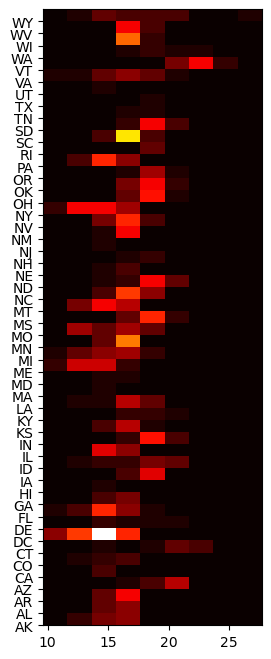

In [24]:
fig, ax= plt.subplots(figsize=(10,8))
# extent = [xmin, xmax, ymin (0, or bottom of State), ymax (length of State)]
extent = [bins.min(), bins.max(), 0, len(table.index)]
ax.imshow(table.values, cmap='hot', extent=extent)
ax.set_yticks(range(len(table.index))) # only have ticks where there are State entries
ax.set_yticklabels(table.index) # States
plt.show()

## Dashboards again (using vega-lite for real this time)

```javascript
{
  "$schema": "https://vega.github.io/schema/vega-lite/v6.json",
  "data": {"url": "data/movies.json"},
  "mark": "bar",
  "encoding": {
    "x": {
      "bin": true,
      "field": "IMDB Rating"
    },
    "y": {"aggregate": "count"}
  }
}
```

In [26]:
chart2 = alt.Chart.from_dict({
    # Data
    "data": {"url": "https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv"},
    # Mark
    "mark": "bar",
    # Scales/Axis
  "encoding": {
    "x": {
      #"bin": true,
      "bin": True,
      "field": "Mobility"
    },
    "y": {"aggregate": "count"}
  }
})
chart2

alt.Chart(...)

In [29]:
chart2 = alt.Chart.from_dict({
    # Data
    "data": {"url": "https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv"},
    # Mark
    "mark": "bar",
    # Scales/Axis
    "encoding": {
      "x": {
        "bin": True,
        "field": "Mobility", 
        "axis":{"title":"Mobility Score"}
    },
    "y": {"aggregate": "count", "axis":{"title":"Frequency"}}
  }
})
chart2

alt.Chart(...)

In [36]:
chart1 = alt.Chart.from_dict({
    # Data
    "data": {"url": "https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv"},
    # Mark
    "mark": "rect",
    # height/width changes
    "height":400,
    # Encodings (scales/axis)
    "encoding":{
        "x":{"field":"Student_teacher_ratio", "bin":{"maxbins":10}, "type":"quantitative"},
        "y":{"field":"State", "type":"ordinal"},
        "color":{"aggregate":"count", "type":"quantitative"}
    }

})
chart1

alt.Chart(...)

In [38]:
chart = alt.HConcatChart(hconcat=[chart1,chart2])
chart

alt.HConcatChart(...)

In [39]:
alt.selection_interval?

Signature:
alt.selection_interval(
    name: 'str | None' = None,
    value: 'Optional[_SelectionIntervalValueMap]' = Undefined,
    bind: 'Optional[Binding | str]' = Undefined,
    empty: 'Optional[bool]' = Undefined,
    expr: 'Optional[str | Expr | Expression]' = Undefined,
    encodings: 'Optional[Sequence[SingleDefUnitChannel_T]]' = Undefined,
    on: 'Optional[str | MergedStreamKwds | DerivedStreamKwds]' = Undefined,
    clear: 'Optional[str | bool | MergedStreamKwds | DerivedStreamKwds]' = Undefined,
    resolve: 'Optional[SelectionResolution_T]' = Undefined,
    mark: 'Optional[BrushConfig | BrushConfigKwds]' = Undefined,
    translate: 'Optional[str | bool]' = Undefined,
    zoom: 'Optional[str | bool]' = Undefined,
    **kwds: 'Any',
) -> 'Parameter'
Docstring:
Create an interval selection parameter. Selection parameters define data queries that are driven by direct manipulation from user input (e.g., mouse clicks or drags). Interval selection parameters are used to select a 

In [40]:
brush = alt.selection_interval() # not quite right

In [41]:
chart1.add_params(brush)

alt.Chart(...)

In [42]:
brush = alt.selection_interval(encodings=['x','y'])

In [43]:
chart1 = alt.Chart.from_dict({
    # Data
    "data": {"url": "https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv"},
    # Mark
    "mark": "rect",
    # height/width changes
    "height":400,
    # Encodings (scales/axis)
    "encoding":{
        "x":{"field":"Student_teacher_ratio", "bin":{"maxbins":10}, "type":"quantitative"},
        "y":{"field":"State", "type":"ordinal"},
        "color":{"aggregate":"count", "type":"quantitative"}
    }

}).add_params(
    brush
)

In [45]:
chart2 = alt.Chart.from_dict({
    # Data
    "data": {"url": "https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv"},
    # Mark
    "mark": "bar",
    # Scales/Axis
    "encoding": {
      "x": {
        "bin": True,
        "field": "Mobility", 
        "axis":{"title":"Mobility Score"}
    },
    "y": {"aggregate": "count", "axis":{"title":"Frequency"}}
  }
}).transform_filter(
    brush
)
#chart2

In [46]:
chart = chart1 | chart2

In [47]:
chart

alt.HConcatChart(...)

## A bit more intuition with Altair

In [48]:
mobility_url = 'https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv'

In [49]:
scatter1 = alt.Chart(mobility_url).mark_point().encode(
    x='Mobility:Q',
    y='Population:Q'
)
scatter1

alt.Chart(...)

In [51]:
scatter2 = alt.Chart(mobility_url).mark_point().encode(
    x='Mobility:Q',
    y='Population:Q', 
    color=alt.Color('Income:Q', scale=alt.Scale(scheme='sinebow'),bin=alt.Bin(maxbins=5))
)
scatter2

alt.Chart(...)

In [52]:
scatter3 = alt.Chart(mobility_url).mark_point().encode(
    x='Mobility:Q',
    #y='Population:Q', 
    y=alt.Y('Population:Q', scale=alt.Scale(type='log')),
    color=alt.Color('Income:Q', scale=alt.Scale(scheme='sinebow'),bin=alt.Bin(maxbins=5))
)
scatter3

alt.Chart(...)

```python
chart1 = alt.Chart.from_dict({
    # Data
    "data": {"url": "https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv"},
    # Mark
    "mark": "rect",
    # height/width changes
    "height":400,
    # Encodings (scales/axis)
    "encoding":{
        "x":{"field":"Student_teacher_ratio", "bin":{"maxbins":10}, "type":"quantitative"},
        "y":{"field":"State", "type":"ordinal"},
        "color":{"aggregate":"count", "type":"quantitative"}
    }

})
```

In [53]:
chart1 = alt.Chart(mobility_url).mark_rect().encode(
    alt.X("Student_teacher_ratio:Q", bin=alt.Bin(maxbins=10)),
    alt.Y("State:O"),
    alt.Color("count()")
).properties(
    height=400
)
chart1

alt.Chart(...)

```python
chart2 = alt.Chart.from_dict({
    # Data
    "data": {"url": "https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv"},
    # Mark
    "mark": "bar",
    # Scales/Axis
    "encoding": {
      "x": {
        "bin": True,
        "field": "Mobility", 
        "axis":{"title":"Mobility Score"}
    },
    "y": {"aggregate": "count", "axis":{"title":"Frequency"}}
  }
})
```

In [54]:
chart2 = alt.Chart(mobility_url).mark_bar().encode(
    alt.X("Mobility:Q", bin=True, axis=alt.Axis(title='Mobility Score')),
    alt.Y("count()", axis=alt.Axis(title='Frequency'))
)
chart2

alt.Chart(...)

In [57]:
brush = alt.selection_interval(encodings=['x','y'])

chart1 = alt.Chart(mobility_url).mark_rect().encode(
    alt.X("Student_teacher_ratio:Q", bin=alt.Bin(maxbins=10)),
    alt.Y("State:O"),
    alt.Color("count()")
).properties(
    height=400
).add_params(
    brush
)

chart2 = alt.Chart(mobility_url).mark_bar().encode(
    alt.X("Mobility:Q", bin=True, axis=alt.Axis(title='Mobility Score')),
    alt.Y("count()", axis=alt.Axis(title='Frequency'))
).transform_filter(
    brush
)

chart = chart1 | chart2
chart

alt.HConcatChart(...)

## One more time -- with locally generated data

In [58]:
mobility_df = pd.read_csv(mobility_url)

In [59]:
mobility_df.head()

ID            Name  Mobility State  Population  Urban  Black  Seg_racial  \
0  100    Johnson City  0.062199    TN      576081      1  0.021       0.090   
1  200      Morristown  0.053652    TN      227816      1  0.020       0.093   
2  301  Middlesborough  0.072635    TN       66708      0  0.015       0.064   
3  302       Knoxville  0.056281    TN      727600      1  0.056       0.210   
4  401   Winston-Salem  0.044801    NC      493180      1  0.174       0.262   

   Seg_income  Seg_poverty  ...  Migration_out  Foreign_born  Social_capital  \
0       0.035        0.030  ...          0.005         0.012          -0.298   
1       0.026        0.028  ...          0.014         0.023          -0.767   
2       0.024        0.015  ...          0.012         0.007          -1.270   
3       0.092        0.084  ...          0.014         0.020          -0.222   
4       0.072        0.061  ...          0.019         0.053          -0.018   

   Religious  Violent_crime  Single_mothers  Divorced  Married  Longitude  \
0      0.514          0.001           0.190     0.110    0.601 -82.436386   
1      0.544          0.002           0.185     0.116    0.613 -83.407249   
2      0.668          0.001           0.211     0.113    0.590 -83.535332   
3      0.602          0.001           0.206     0.114    0.575 -84.242790   
4      0.488          0.003           0.220     0.092    0.586 -80.505333   

    Latitude  
0  36.470371  
1  36.096539  
2  36.551540  
3  35.952259  
4  36.081276  

[5 rows x 43 columns]

In [60]:
brush = alt.selection_interval(encodings=['x','y'])

chart1 = alt.Chart(mobility_df).mark_rect().encode(
    alt.X("Student_teacher_ratio:Q", bin=alt.Bin(maxbins=10)),
    alt.Y("State:O"),
    alt.Color("count()")
).properties(
    height=400
).add_params(
    brush
)

chart2 = alt.Chart(mobility_df).mark_bar().encode(
    alt.X("Mobility:Q", bin=True, axis=alt.Axis(title='Mobility Score')),
    alt.Y("count()", axis=alt.Axis(title='Frequency'))
).transform_filter(
    brush
)

chart = chart1 | chart2
chart

alt.HConcatChart(...)